# Walmart Sales Forecast: Notebook 1

### Problem Statement:

The dataset contains historical sales data for 45 Walmart stores located in different regions. Various events and holidays significantly impact daily sales. Walmart faces challenges due to unforeseen demand fluctuations and stockouts. This project aims to analyze the different attributes influencing sales and to develop accurate predictive models to forecast sales and demand, thereby improving inventory management and reducing stockouts.

### Objectives of this Notebook:

1. **Providing an Introduction to the project**

2. **Load and Explore the Dataset**

3. **Initial Data Cleaning and Preprocessing**

4. **Exploratory Data Analysis (EDA)**

5. **Visualization**

In [12]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('../data/Walmart_Store_sales.csv')  
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Let's print some basic information about the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Upon examining the numeric columns, we find that there are no clear outliers. Features such as temperature, sales, fuel price, and unemployment rates are all within reasonable ranges. Given that the numeric features are already in a proper range, scaling them is less critical in this context.


Data Cleaning and Preprocessing

In [16]:
print("Number of records: ", data.shape[0])
print("Number of attributes: ", data.shape[1])
print("Columns:")
print(data.dtypes)

Number of records:  6435
Number of attributes:  8
Columns:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [17]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Checking for missing values and duplicates
print("Missing Values:")
print(data.isnull().sum())

print("Duplicate Rows:", data.duplicated().sum())

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Duplicate Rows: 0


No missing values or duplicate records in the dataset.

## Exploratory Data Analysis

1. Distribution of Weekly Sales

/Users/hrishi/ENTER/envs/walmart_sales/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


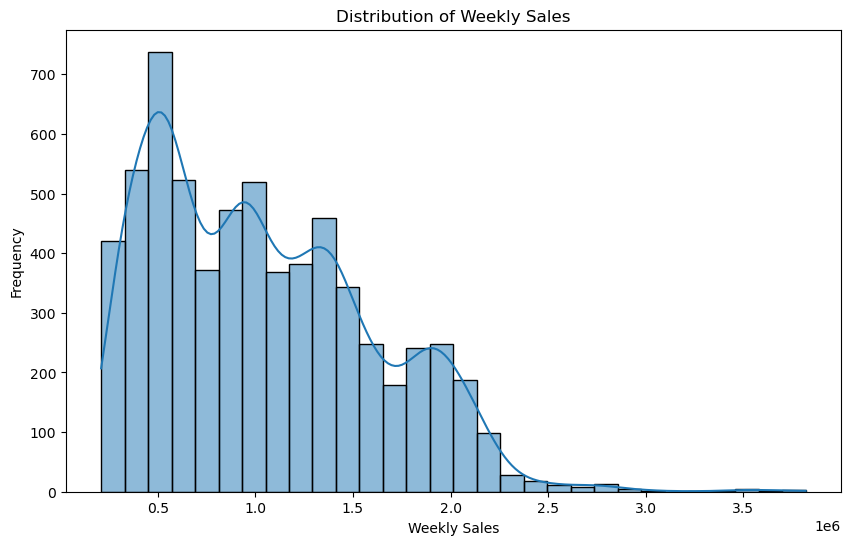

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

2. Weekly Sales Over Time

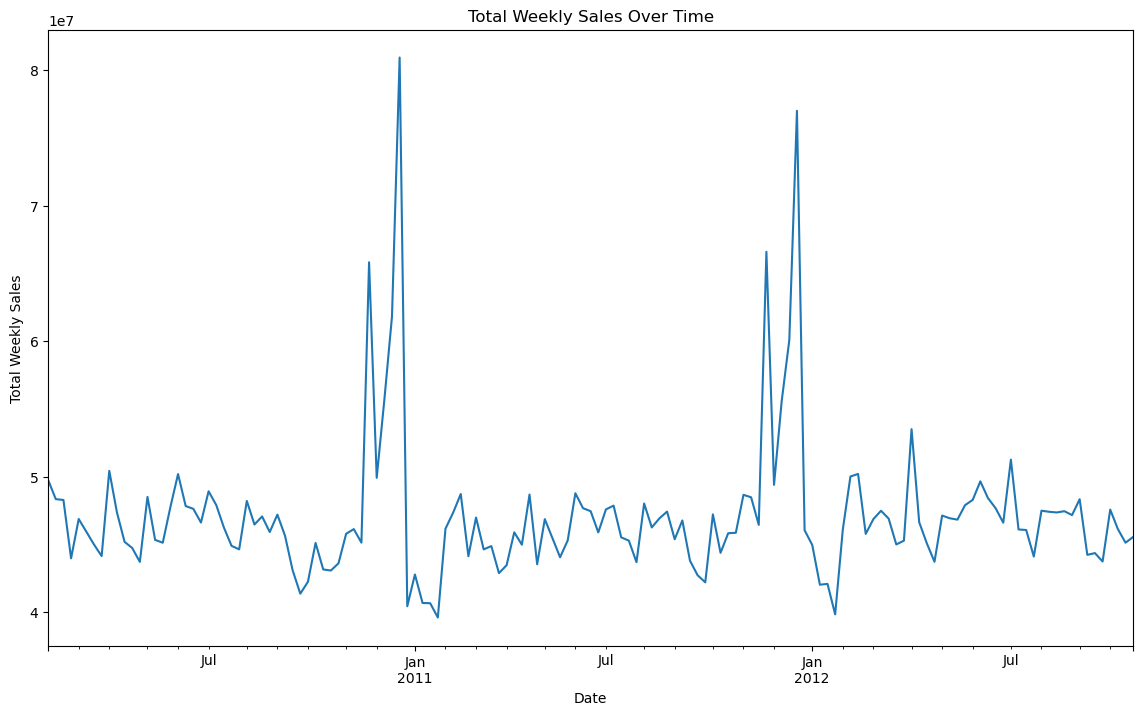

In [19]:
plt.figure(figsize=(14, 8))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

3. Weekly Sales by Store

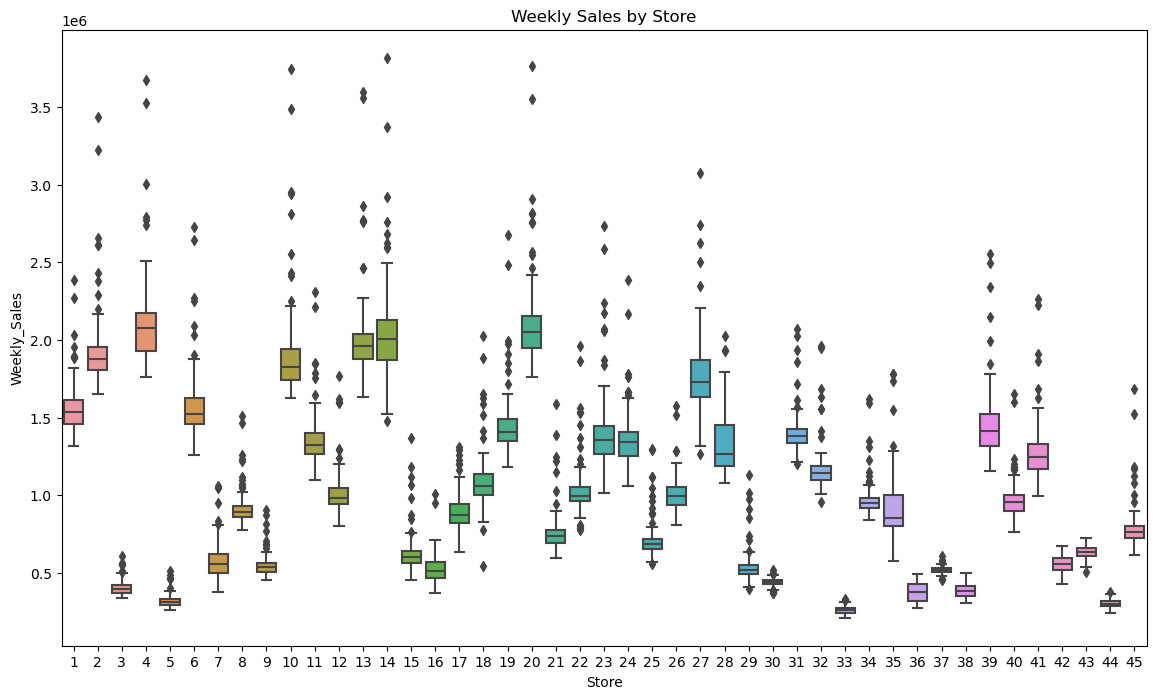

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

4. Impact of Holidays on Sales

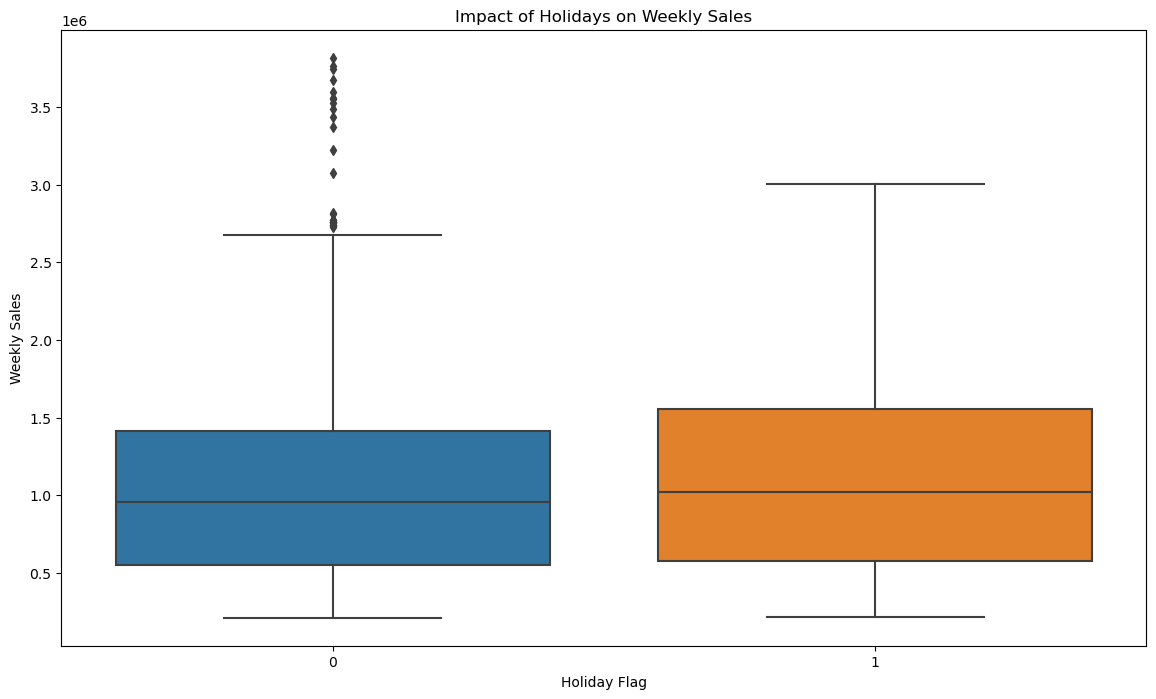

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

##### Now we will look at how different attributes in the dataset impact weekly sales

5. Temperature vs. Weekly Sales

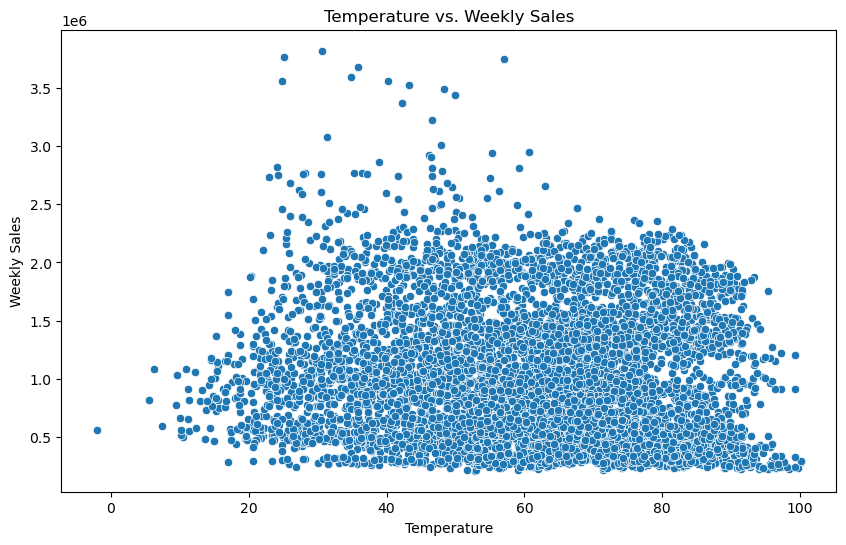

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

6. Fuel Price vs. Weekly Sales

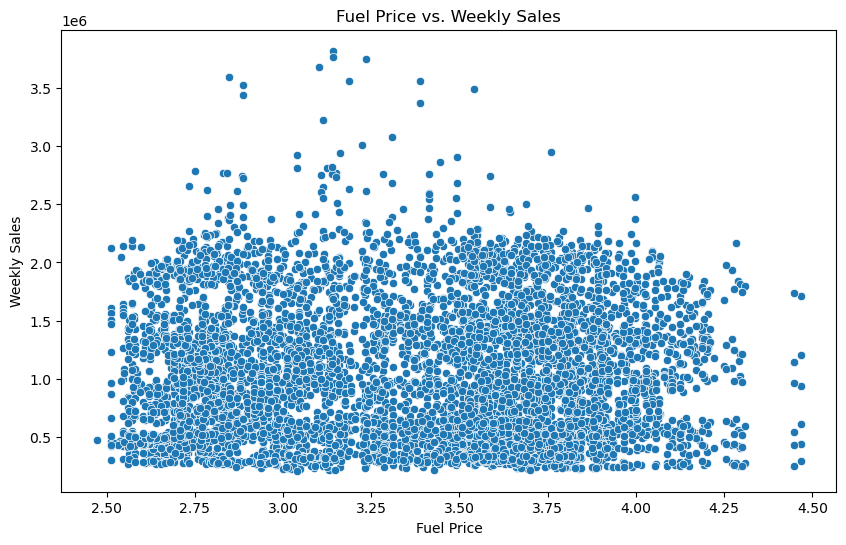

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


7. CPI (Customer Price Index) vs. Weekly Sales


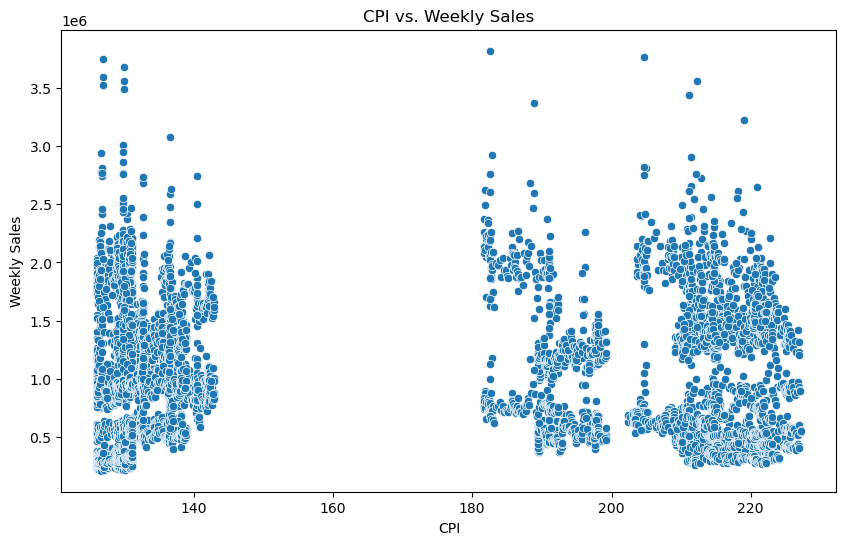

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

8. Unemployment vs. Weekly Sales

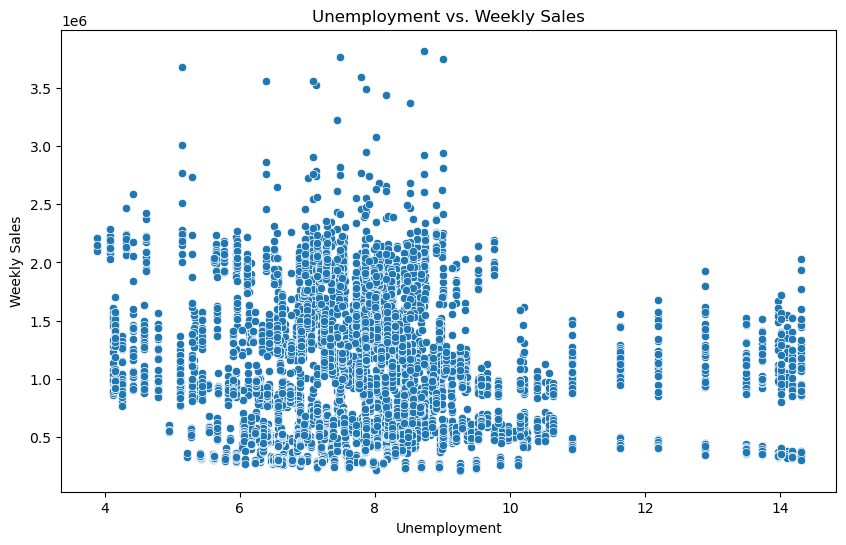

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Unemployment vs. Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

9. Diving deeper into holiday sales.

Analyzing Specific Holidays

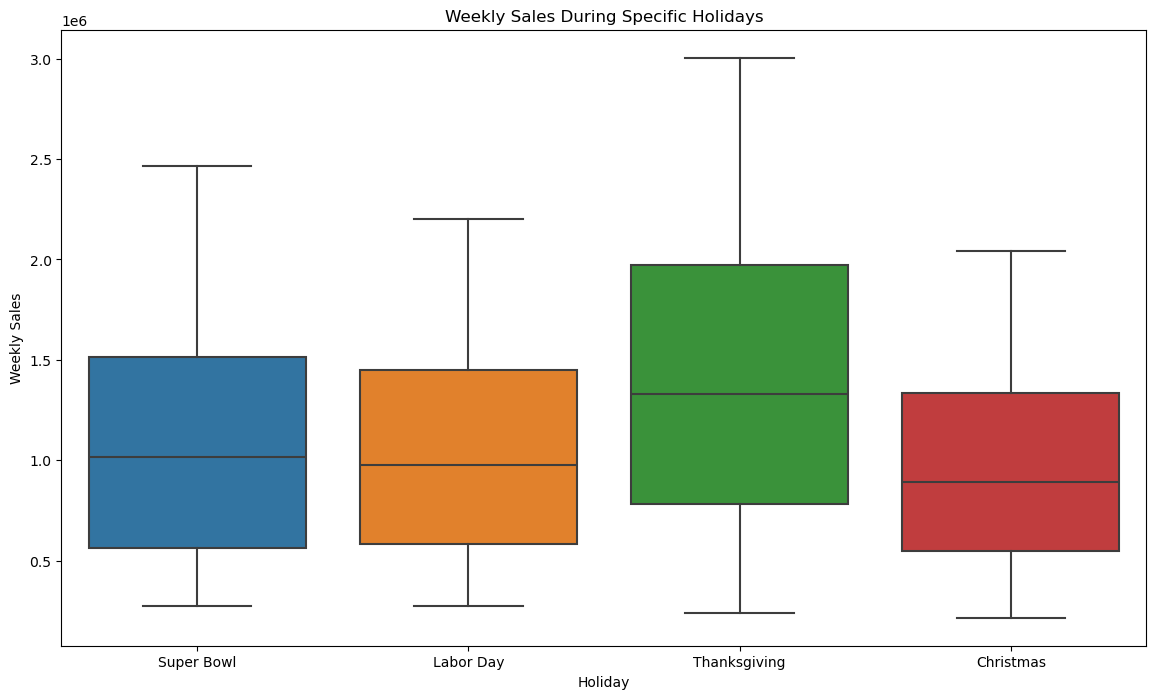

In [26]:
import warnings
warnings.filterwarnings("ignore")  

# Some major holiday dates (in the timespan of the dataset)
holidays = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labor Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
}

# Converting holiday dates to datetime
for holiday, dates in holidays.items():
    holidays[holiday] = pd.to_datetime(dates)

# Aggregate sales data for each holiday
holiday_sales_data = pd.DataFrame()
for holiday, dates in holidays.items():
    holiday_data = data[data['Date'].isin(dates)]
    holiday_data['Holiday'] = holiday
    holiday_sales_data = pd.concat([holiday_sales_data, holiday_data])

# Plot boxplots for each holiday
plt.figure(figsize=(14, 8))
sns.boxplot(x='Holiday', y='Weekly_Sales', data=holiday_sales_data)
plt.title('Weekly Sales During Specific Holidays')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.show()


10. Correlation

In [27]:
corr_matrix = data.corr()

# Correlations with 'Weekly_Sales'
weekly_sales_corr = corr_matrix['Weekly_Sales']
print(weekly_sales_corr)

Store          -0.335332
Date            0.006949
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64


## Findings and Conclusions:

1. **Distribution of Weekly Sales**:
   - The distribution of weekly sales shows a right-skewed pattern with a long tail, indicating that a small number of weeks have very high sales.

2. **Sales Trends Over Time**:
   - Clear trends are visible in the sales data over time, with noticeable peaks and troughs. The largest troughs occur after the largest peaks, suggesting that weeks with high sales (holidays/special events) are often followed by weeks with lower-than-usual sales.

3. **Monthly Sales Patterns**:
   - January sales are significantly lower than in other months. This is likely due to high sales in November and December, as consumers tend to spend less in January after the holiday season.

4. **Sales Across Stores**:
   - Sales vary significantly across different stores, with some stores consistently performing better than others.

5. **Impact of Holidays**:
   - Holidays on average show an increase in sales, indicating their significant impact on consumer behavior.

6. **Correlation with Other Attributes**:
   - There is a weak correlation between weekly sales and attributes like unemployment rates, CPI, fuel prices, and temperature. This suggests that the majority of sales might be for essential goods, necessitating the creation of time-series features (like lag and rolling mean/std) to capture the data more appropriately going forward.

7. **Impact of Major Holidays and Events**:
   - Major holidays and events, such as Thanksgiving and the Super Bowl, have higher median sales and greater variability, reflecting increased consumer spending. Understanding sales patterns around these events can help Walmart better prepare for stock demands and promotional activities. These insights can be used to enhance sales forecasting models and improve inventory management, reducing the risk of stockouts during peak periods.

8. **Next Steps**:
   - In the next notebook, we will perform further analysis using SQL and move on to predictive modeling.


#### Made by Hrishikesh Reddy Papasani
##### LinkedIn: https://www.linkedin.com/in/hrishikesh-reddy-papasani-02110725a/
##### Github: https://github.com/Hrishikesh-Papasani
##### Contact: hrpapasani@gmail.com